<h1> idris tarek Elsayed Awad<h1>
<h2>The spark Foundation : task 2(Color Detection)<h2>


In [59]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

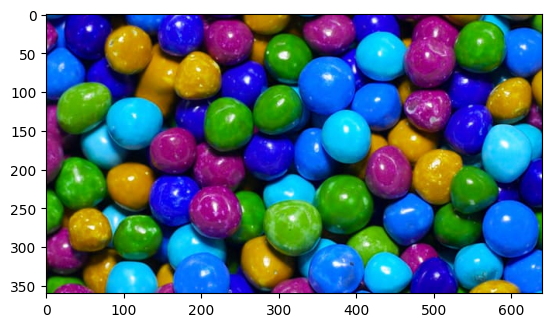

In [3]:
img=cv2.imread('./data/img.jpg')
plt.imshow(img)

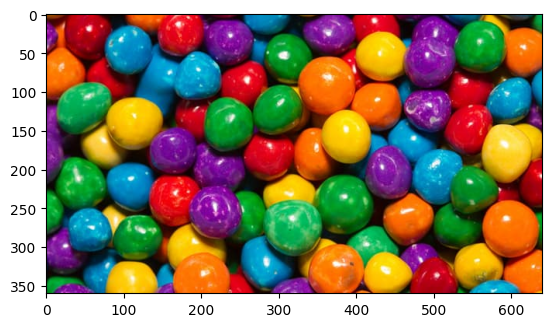

In [4]:
#convert image to RGB
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

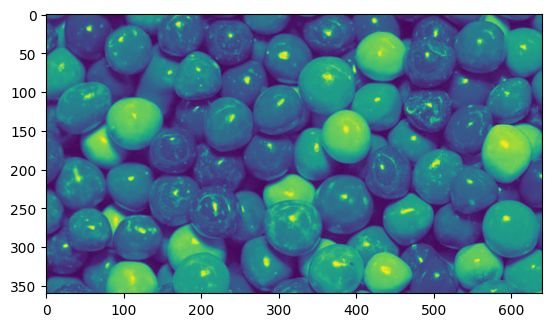

In [5]:
#convert image to RGB
gray_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_rgb)

In [ ]:
import cv2
import numpy as np
import pandas as pd

frame = cv2.imread('./data/img.jpg')

r = g = b = xpos = ypos = 0

# Specify column names
index = ['color', 'color name', 'hex', 'R', 'G', 'B']

# Read the CSV file with specified column names
df = pd.read_csv('./data/colors.csv', names=index, header=None)
df = pd.DataFrame(df)

def get_colorname(R, G, B):
    min_diff = 1000  # Initialize a large minimum difference
    cname = ""

    for i in range(len(df)):
        d = abs(R - df.loc[i, "R"]) + abs(G - df.loc[i, "G"]) + abs(B - df.loc[i, "B"])
        if d <= min_diff:
            min_diff = d
            cname = df.loc[i, 'color name'] + '   Hex=' + df.loc[i, 'hex']

    return cname

def ident_color(event, x, y, flags, param):
    global r, g, b, xpos, ypos

    if event == cv2.EVENT_LBUTTONDOWN:
        xpos = x
        ypos = y
        b, g, r = frame[y, x]
        b = int(b)
        g = int(g)
        r = int(r)

cv2.namedWindow('image')
cv2.setMouseCallback('image', ident_color)

while True:
    cv2.rectangle(frame, (20, 40), (600, 50), (b, g, r), -1)
    text = get_colorname(b, g, r) + '   R=' + str(r) + '  G=' + str(g) + '  B=' + str(b)
    cv2.putText(frame, text, (70, 70), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (25, 25, 25), 1)
    
    if r + g + b >= 600:
        cv2.putText(frame, text, (50, 50), 2, 0.8, (0, 0, 0), 2, cv2.LINE_AA)

    cv2.imshow('image', frame)

    key = cv2.waitKey(1)
    if key == 27:  # Press 'Esc' to exit the loop
        break

cv2.destroyAllWindows()


In [58]:

import cv2
import numpy as np
import pandas as pd

cap = cv2.VideoCapture(0)

r = g = b = xpos = ypos = 0

# Specify column names
index = ['color', 'color name', 'hex', 'R', 'G', 'B']

# Read the CSV file with specified column names
df = pd.read_csv('./data/colors.csv', names=index, header=None)
df = pd.DataFrame(df)

def get_colorname(R, G, B):
    min_diff = 1000  # Initialize a large minimum difference
    cname = ""

    for i in range(len(df)):
        d = abs(R - df.loc[i, "R"]) + abs(G - df.loc[i, "G"]) + abs(B - df.loc[i, "B"])
        if d <= min_diff:
            min_diff = d
            cname = df.loc[i, 'color name'] + '   Hex=' + df.loc[i, 'hex']

    return cname

def ident_color(event, x, y, flags, param):
    global r, g, b, xpos, ypos

    if event == cv2.EVENT_LBUTTONDOWN:
        xpos = x
        ypos = y
        b, g, r = frame[y, x]
        b=int(b)
        g=int(g)
        r=int(r)

        

cv2.namedWindow('image')
cv2.setMouseCallback('image', ident_color)

while True:
    _, frame = cap.read()
    mask = np.ones((5, 5), np.uint8)
    cv2.rectangle(frame, (20, 40), (600, 50), (b, g, r), -1)
    text = get_colorname(b, g, r) + '   R=' + str(r) + '  G=' + str(g) + '  B=' + str(b)
    cv2.putText(frame, text, (70, 70), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (25, 25, 25), 1)

    if r + g + b >= 600:
        cv2.putText(frame, text, (50, 50), 2, 0.8, (0, 0, 0), 2, cv2.LINE_AA)

    cv2.imshow('image', frame)

    if cv2.waitKey(1) == 27:
        break

cap.release()
cv2.destroyAllWindows()



In [6]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while True:
    _, frame = cap.read()
    hsvframe = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Red color
    lower_red = np.array([136, 87, 111], np.uint8)
    upper_red = np.array([180, 255, 255], np.uint8)
    r_mask = cv2.inRange(hsvframe, lower_red, upper_red)
    r_color = cv2.bitwise_and(frame, frame, mask=r_mask)

    # Blue color
    lower_blue = np.array([25, 52, 72], np.uint8)
    upper_blue = np.array([102, 255, 255], np.uint8)
    b_mask = cv2.inRange(hsvframe, lower_blue, upper_blue)
    b_color = cv2.bitwise_and(frame, frame, mask=b_mask)

    # Green color
    lower_green = np.array([94, 80, 2], np.uint8)
    upper_green = np.array([12, 255, 255], np.uint8)
    g_mask = cv2.inRange(hsvframe, lower_green, upper_green)
    g_color = cv2.bitwise_and(frame, frame, mask=g_mask)

    combined_mask = b_mask + r_mask + g_mask

    contours, hierarchy = cv2.findContours(combined_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    for img, count in enumerate(contours):
        area = cv2.contourArea(count)
        if area > 300:
            x, y, w, h = cv2.boundingRect(count)
            imgframe = cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 255), 1)
            if np.any(r_mask[y:y+h, x:x+w]):
                cv2.putText(imgframe, "Red color", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            if np.any(b_mask[y:y+h, x:x+w]):
                cv2.putText(imgframe, "Blue color", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
            if np.any(g_mask[y:y+h, x:x+w]):
                cv2.putText(imgframe, "Green color", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    cv2.imshow("out", imgframe)

    if cv2.waitKey(1) == 27:
        break

cap.release()
cv2.destroyAllWindows()
